Q1. Can we use Bagging for regression problems?
- Yes, Bagging can be used for regression problems.In regression, it averages the predictions of multiple base regressors (like Decision Trees) to reduce variance and improve accuracy.

Q2. What is the difference between multiple model training and single model training?
- In single model training, only one algorithm is trained on the data, which may overfit or underfit.
- Multiple model training (like ensemble methods) combines several models to improve performance, stability, and generalization.

Q3.  Explain the concept of feature randomness in Random Forest?
-Feature randomness in Random Forest means that at each split in a tree, only a random subset of features is considered.This helps make the trees less correlated and improves the overall accuracy and robustness of the model.

Q4. What is OOB (Out-of-Bag) Score?
- OOB (Out-of-Bag) Score is an internal validation method used in Bagging.It measures model accuracy using the data not included in each bootstrap sample, giving a reliable performance estimate without needing a separate validation set.

Q5. How can you measure the importance of features in a Random Forest model?\
- Feature importance in Random Forest is measured by how much each feature decreases impurity (like Gini or MSE) across all trees.Scikit-learn provides .feature_importances_ to access these scores and rank the most influential features.

Q6. Explain the working principle of a Bagging Classifier?
- A Bagging Classifier trains multiple instances of the same model on different random subsets (with replacement) of the training data.It combines their predictions (by majority vote for classification) to reduce variance and improve accuracy.

Q7. How do you evaluate a Bagging Classifier’s performance?
-A Bagging Classifier’s performance is evaluated using metrics like accuracy, precision, recall, F1-score, and ROC-AUC.You can also use cross-validation or Out-of-Bag (OOB) score for reliable performance estimation

Q8. How does a Bagging Regressor work?
- A Bagging Regressor trains multiple regressors (like Decision Trees) on different random subsets of the data.
It then averages their predictions to reduce variance and improve prediction stability.

Q9. What is the main advantage of ensemble techniques?
- The main advantage of ensemble techniques is that they combine multiple models to improve accuracy, robustness, and generalization.They reduce overfitting and make predictions more stable than individual models.

Q10. What is the main challenge of ensemble methods?
- The main challenge of ensemble methods is increased computational complexity and training time.They can also be harder to interpret compared to single models due to their complexity.

Q11.  Explain the key idea behind ensemble techniques.
- The key idea behind ensemble techniques is to combine predictions from multiple models to create a stronger overall model.This helps reduce errors by minimizing variance, bias, or improving prediction stability.

Q12. What is a Random Forest Classifier?
- A Random Forest Classifier is an ensemble method that builds multiple decision trees using random subsets of data and features.It combines their outputs (majority voting) to improve accuracy and reduce overfitting.

#13. What are the main types of ensemble techniques?
- The main types of ensemble techniques are:
    - Bagging (Bootstrap Aggregating) – Reduces variance by training models on different subsets.
    - Boosting – Reduces bias by training models sequentially to fix previous errors.
    - Stacking – Combines predictions from multiple models using a meta-model for final prediction.


Q14. What is ensemble learning in machine learning?
- Ensemble learning is a technique in machine learning where multiple models (often weak learners) are combined to solve a problem.The goal is to achieve better performance and generalization than any single model alone.

Q15. When should we avoid using ensemble methods?
- We should avoid using ensemble methods when the dataset is small, model interpretability is crucial, or computational resources are limited.Also, if a simple model already performs well, ensembles may add unnecessary complexity.

Q16.  How does Bagging help in reducing overfitting?
- Bagging reduces overfitting by training multiple models on different random subsets of the data.Their combined predictions smooth out noise and variance, making the final model more stable and less likely to overfit.

Q17.  Why is Random Forest better than a single Decision Tree?
- Random Forest is better than a single Decision Tree because it reduces overfitting and improves accuracy.By combining multiple trees trained on different data and features, it offers more robust and generalizable predictions.

Q18. What is the role of bootstrap sampling in Bagging?
- Bootstrap sampling in Bagging creates multiple random subsets of the training data (with replacement).Each model is trained on a different subset, increasing diversity and reducing variance in the final combined model.

Q19. What are some real-world applications of ensemble techniques?
- Real-world applications of ensemble techniques include:
    - Fraud detection in banking and finance
    - Medical diagnosis for predicting diseases
    - Spam detection in emails
    - Stock market prediction and customer churn analysis in business analytics

Q20. What is the difference between Bagging and Boosting?
- Bagging trains multiple models in parallel on random subsets to reduce variance.
- Boosting trains models sequentially, each trying to fix the errors of the previous one, to reduce bias and improve accuracy.

In [84]:
#21.Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.datasets import load_wine
data = load_wine()
data.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [86]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [87]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [88]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [89]:
X.shape, y.shape

((178, 13), (178,))

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [91]:
X_train.shape, X_test.shape

((124, 13), (54, 13))

In [92]:
y_train.shape, y_test.shape

((124,), (54,))

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

In [94]:
model = BaggingClassifier(estimator = DecisionTreeClassifier(), n_estimators = 10, random_state = 1)
model

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [95]:
model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=1)

In [96]:
y_pred = model.predict(X_test)
y_pred

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0, 0, 1, 0, 0, 0, 1, 2, 2, 0])

In [97]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9814814814814815


In [98]:
#22.  Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 0.2573


In [99]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance Scores:\n")
print(importance_df)

Feature Importance Scores:

                    Feature  Importance
7       mean concave points    0.141934
27     worst concave points    0.127136
23               worst area    0.118217
6            mean concavity    0.080557
20             worst radius    0.077975
22          worst perimeter    0.074292
2            mean perimeter    0.060092
3                 mean area    0.053810
26          worst concavity    0.041080
0               mean radius    0.032312
13               area error    0.029538
21            worst texture    0.018786
25        worst compactness    0.017539
10             radius error    0.016435
28           worst symmetry    0.012929
12          perimeter error    0.011770
24         worst smoothness    0.011769
1              mean texture    0.011064
5          mean compactness    0.009216
19  fractal dimension error    0.007135
29  worst fractal dimension    0.006924
4           mean smoothness    0.006223
14         smoothness error    0.005881
16          

In [100]:
#24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [101]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [102]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [103]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [104]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

In [105]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [107]:
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [108]:
y_train.shape, y_test.shape

((14448,), (6192,))

In [109]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [110]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [111]:
rf_model = RandomForestRegressor(n_estimators=10, random_state = 1)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error
dt_mse = mean_squared_error(y_test, dt_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

In [113]:
print("The MSE of Decision Tree is : ", dt_mse)
print("The MSE of Random Forest is : ", rf_mse)

The MSE of Decision Tree is :  0.4992704529336724
The MSE of Random Forest is :  0.2881054351914756


In [114]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=1)

In [115]:
X.shape, y.shape

((1000, 20), (1000,))

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [117]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=1)

In [118]:
model.oob_score_

0.8485714285714285

#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.

In [119]:
from sklearn.datasets import load_iris
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [120]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [121]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [122]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [123]:
X.shape, y.shape

((150, 4), (150,))

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [125]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

In [126]:
model = BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=1)
model

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=1)

In [127]:
model.fit(X_train, y_train)

BaggingClassifier(estimator=SVC(), n_estimators=100, random_state=1)

In [128]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [129]:
print(accuracy_score(y_test, y_pred))

0.9777777777777777


In [130]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train Random Forests with different numbers of trees
tree_counts = [1, 5, 10, 50, 100, 200]
accuracies = []

for n in tree_counts:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"n_estimators = {n} --> Accuracy: {acc * 100:.2f}%")

n_estimators = 1 --> Accuracy: 94.74%
n_estimators = 5 --> Accuracy: 96.49%
n_estimators = 10 --> Accuracy: 96.49%
n_estimators = 50 --> Accuracy: 97.08%
n_estimators = 100 --> Accuracy: 97.08%
n_estimators = 200 --> Accuracy: 97.08%


In [131]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Initialize BaggingClassifier with Logistic Regression as base estimator
model = BaggingClassifier(estimator=LogisticRegression(max_iter=1000), n_estimators=50, random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Predict probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Step 6: Calculate AUC score
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc:.4f}")

AUC Score: 0.9982


Feature Importances:

      Feature  Importance
0      MedInc    0.524871
5    AveOccup    0.138443
6    Latitude    0.088936
7   Longitude    0.088629
1    HouseAge    0.054593
2    AveRooms    0.044272
4  Population    0.030650
3   AveBedrms    0.029606


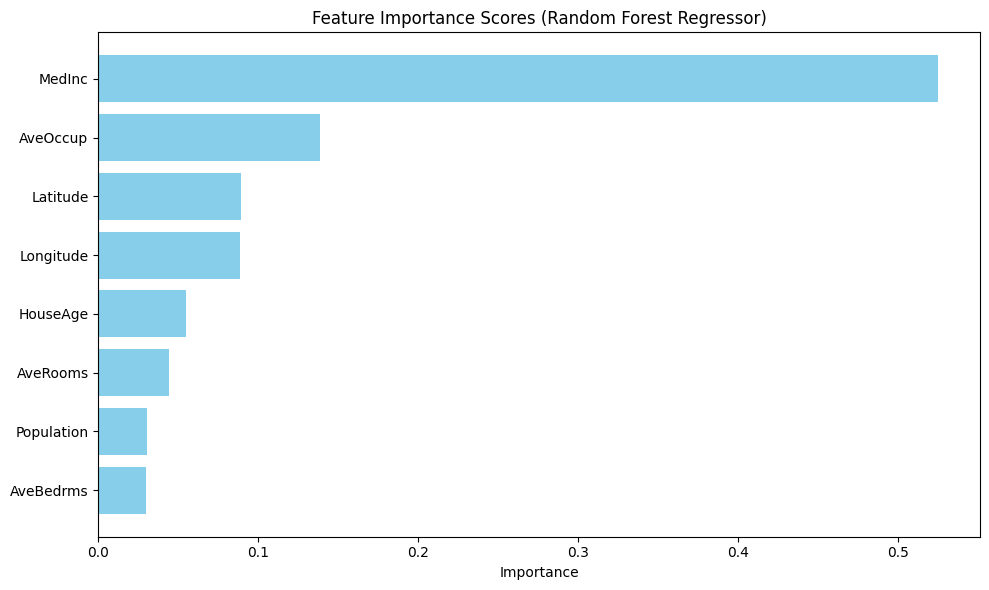

In [132]:
#29. Train a Random Forest Regressor and analyze feature importance scores.
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Step 5: Print feature importances
print("Feature Importances:\n")
print(importance_df)

# Step 6: Optional - Plot feature importances
plt.figure(figsize=(10,6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance Scores (Random Forest Regressor)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [133]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Bagging Classifier with Decision Trees
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_preds = bagging_model.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)

# Step 4: Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)

# Step 5: Print accuracies
print(f"Bagging Classifier Accuracy      : {bagging_acc * 100:.2f}%")
print(f"Random Forest Classifier Accuracy: {rf_acc * 100:.2f}%")

Bagging Classifier Accuracy      : 95.91%
Random Forest Classifier Accuracy: 97.08%


In [134]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [135]:
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

In [136]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [137]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [138]:
X.shape, y.shape

((150, 4), (150,))

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [140]:
X_train.shape, X_test.shape

((105, 4), (45, 4))

In [141]:
y_train.shape, y_test.shape

((105,), (45,))

In [142]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [143]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [144]:
gs_cv = GridSearchCV(estimator=model, param_grid=param_grid, cv = 5, verbose = 2, scoring = 'accuracy')
gs_cv

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [145]:
gs_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, min_samples_split=2, n_estimators=150; total time=   0.0s
[CV] END max_depth=None, min_s

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=2)

In [146]:
gs_cv.best_params_

{'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}

In [147]:
gs_cv.best_score_

np.float64(0.9523809523809523)

In [148]:
y_pred = gs_cv.best_estimator_.predict(X_test)

In [149]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9555555555555556

n_estimators=1 --> MSE: 0.5501
n_estimators=5 --> MSE: 0.3060
n_estimators=10 --> MSE: 0.2824
n_estimators=25 --> MSE: 0.2632
n_estimators=50 --> MSE: 0.2573
n_estimators=100 --> MSE: 0.2559


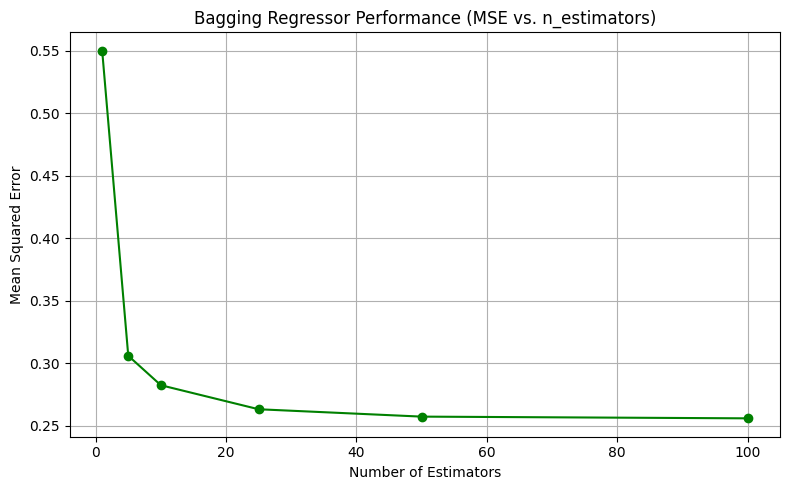

In [164]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance.
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Try different n_estimators
n_estimators_list = [1, 5, 10, 25, 50, 100]
mse_scores = []

for n in n_estimators_list:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f"n_estimators={n} --> MSE: {mse:.4f}")

# Step 4: Plot MSE vs. number of estimators
plt.figure(figsize=(8,5))
plt.plot(n_estimators_list, mse_scores, marker='o', color='green')
plt.title('Bagging Regressor Performance (MSE vs. n_estimators)')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()

In [151]:
#33. Train a Random Forest Classifier and analyze misclassified samples.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names
target_names = data.target_names

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Step 6: Find misclassified samples
misclassified_indices = (y_pred != y_test)
X_test_misclassified = X_test[misclassified_indices]
y_true_misclassified = y_test[misclassified_indices]
y_pred_misclassified = y_pred[misclassified_indices]

# Step 7: Display misclassified samples
print(f"\nNumber of Misclassified Samples: {len(y_true_misclassified)}\n")
misclassified_df = pd.DataFrame(X_test_misclassified, columns=feature_names)
misclassified_df['True Label'] = y_true_misclassified
misclassified_df['Predicted Label'] = y_pred_misclassified
print(misclassified_df.head())


Accuracy: 96.49%

Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Number of Misclassified Samples: 4

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        13.34         15.86           86.49      520.0          0.10780   
1        13.80         15.79           90.43      584.1          0.10070   
2        13.96         17.05           91.43      602.4          0.10960   
3        14.48         21.46           94.25      648.2          0.09444   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.15350         0.11690              0.06987         0.1942   
1           0.12800         0.07789              0.05069        

In [152]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Single Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_preds = tree.predict(X_test)
tree_acc = accuracy_score(y_test, tree_preds)

# Step 4: Bagging Classifier with Decision Trees
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)
bagging_preds = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_preds)

# Step 5: Results
print(f"Decision Tree Accuracy       : {tree_acc * 100:.2f}%")
print(f"Bagging Classifier Accuracy  : {bagging_acc * 100:.2f}%")


Decision Tree Accuracy       : 94.74%
Bagging Classifier Accuracy  : 95.61%


Accuracy: 96.49%


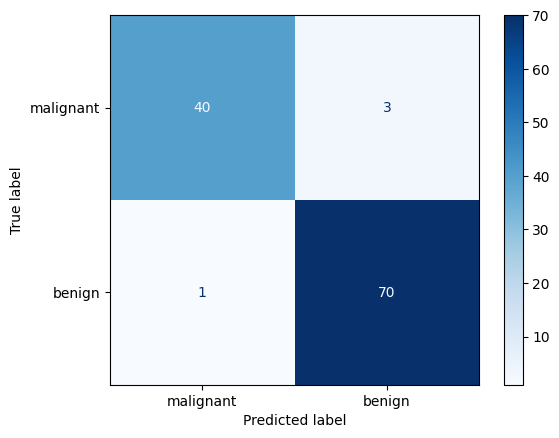

In [153]:
#35. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
target_names = data.target_names

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Step 4: Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap='Blues', values_format='d')


In [154]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Load data
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define base models
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Step 4: Define stacking model
stacking_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

# Step 5: Fit stacking model
stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)

# Step 6: Fit individual models for comparison
dt = DecisionTreeClassifier(random_state=42)
svm = SVC(probability=True, random_state=42)

dt.fit(X_train, y_train)
svm.fit(X_train, y_train)

acc_dt = accuracy_score(y_test, dt.predict(X_test))
acc_svm = accuracy_score(y_test, svm.predict(X_test))

# Step 7: Print accuracies
print(f"Decision Tree Accuracy: {acc_dt * 100:.2f}%")
print(f"SVM Accuracy: {acc_svm * 100:.2f}%")
print(f"Stacking Classifier Accuracy: {accuracy_stack * 100:.2f}%")


Decision Tree Accuracy: 94.74%
SVM Accuracy: 94.74%
Stacking Classifier Accuracy: 96.49%


In [155]:
#37. Train a Random Forest Classifier and print the top 5 most important features
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Get feature importances
importances = model.feature_importances_

# Step 5: Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Step 6: Print top 5 features
print("Top 5 Most Important Features:")
print(feature_importance_df.head(5))


Top 5 Most Important Features:
                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [156]:
#38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Bagging Classifier with Decision Tree as base estimator
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict
y_pred = model.predict(X_test)

# Step 5: Evaluate using Precision, Recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['malignant', 'benign']))


Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        43
      benign       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



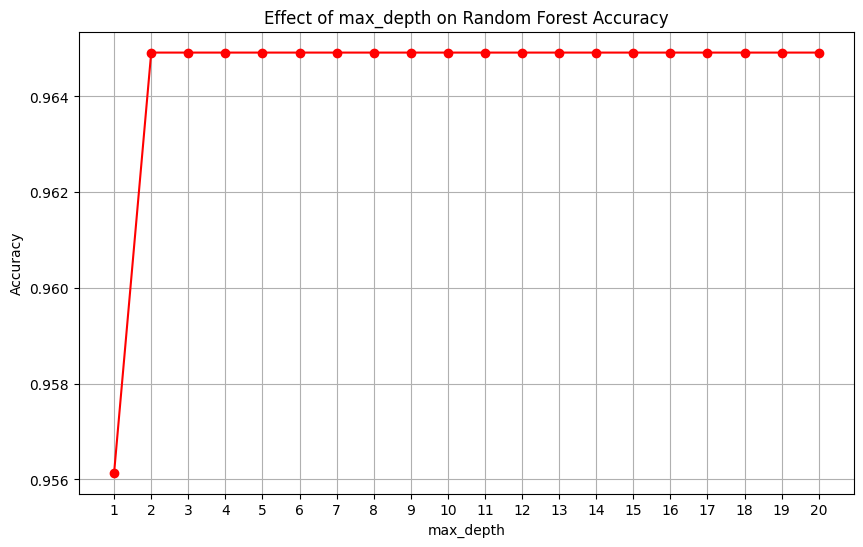

Best accuracy of 96.49% achieved at max_depth = 2


In [165]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Evaluate effect of different max_depth values
depths = range(1, 21)  # testing depths from 1 to 20
accuracies = []

for depth in depths:
    model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Step 4: Plot results
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', color='red')
plt.title("Effect of max_depth on Random Forest Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(depths)
plt.show()

# Step 5: Print best accuracy
best_depth = depths[accuracies.index(max(accuracies))]
print(f"Best accuracy of {max(accuracies) * 100:.2f}% achieved at max_depth = {best_depth}")

In [158]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load dataset
data = load_diabetes()
X, y = data.data, data.target

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Bagging with Decision Tree
bagging_dt = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_dt.fit(X_train, y_train)
y_pred_dt = bagging_dt.predict(X_test)

# Step 4: Train Bagging with KNN
bagging_knn = BaggingRegressor(estimator=KNeighborsRegressor(), n_estimators=100, random_state=42)
bagging_knn.fit(X_train, y_train)
y_pred_knn = bagging_knn.predict(X_test)

# Step 5: Evaluate performance
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Step 6: Print results
print(" Performance Comparison (Bagging Regressor):\n")
print(" DecisionTreeRegressor:")
print(f"   - Mean Squared Error: {mse_dt:.2f}")
print(f"   - R² Score: {r2_dt:.2f}")

print("\n KNeighborsRegressor:")
print(f"   - Mean Squared Error: {mse_knn:.2f}")
print(f"   - R² Score: {r2_knn:.2f}")


 Performance Comparison (Bagging Regressor):

 DecisionTreeRegressor:
   - Mean Squared Error: 2970.86
   - R² Score: 0.44

 KNeighborsRegressor:
   - Mean Squared Error: 2895.68
   - R² Score: 0.45


✅ ROC-AUC Score: 0.9953


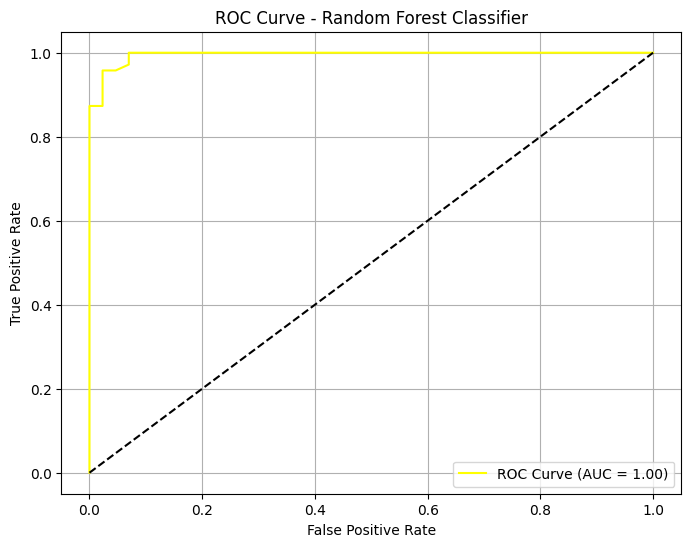

In [166]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of positive class

# Step 5: Evaluate with ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")

# Step 6: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='yellow')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Classifier")
plt.legend()
plt.grid(True)
plt.show()

In [160]:
#42.  Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Define Bagging Classifier with Decision Tree
model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Step 3: Evaluate using 5-fold cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Step 4: Print results
print("Bagging Classifier Performance (5-Fold Cross-Validation):")
print(f"Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Bagging Classifier Performance (5-Fold Cross-Validation):
Accuracy Scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]
Mean Accuracy: 0.9579
Standard Deviation: 0.0382


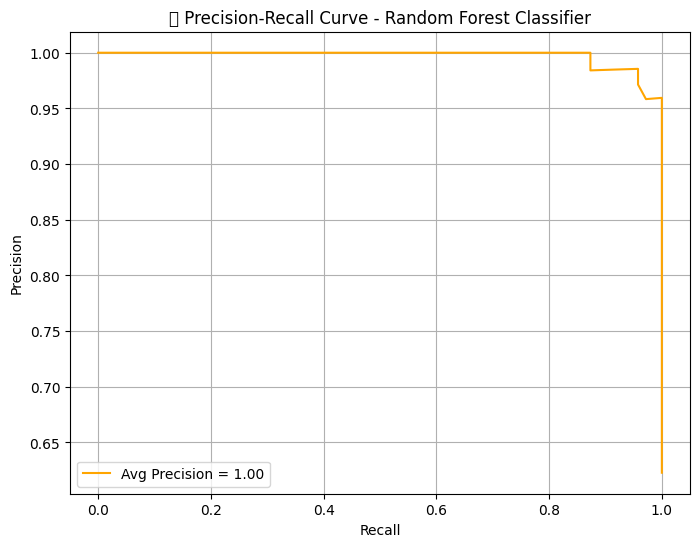

In [167]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curve.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 4: Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Step 5: Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Step 6: Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Avg Precision = {avg_precision:.2f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('📊 Precision-Recall Curve - Random Forest Classifier')
plt.legend()
plt.grid(True)
plt.show()

In [162]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Step 2: Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define base and final estimators
rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression(max_iter=1000, solver='liblinear')

# Stacking Classifier
stack_model = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],
    final_estimator=LogisticRegression(max_iter=1000),
    passthrough=True,
    cv=5
)

# Step 4: Fit models
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
stack_model.fit(X_train, y_train)

# Step 5: Predict and compare accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))
lr_acc = accuracy_score(y_test, lr.predict(X_test))
stack_acc = accuracy_score(y_test, stack_model.predict(X_test))

# Step 6: Print results
print("Accuracy Comparison:")
print(f"Random Forest Accuracy     : {rf_acc:.4f}")
print(f"Logistic Regression Accuracy: {lr_acc:.4f}")
print(f"Stacking Classifier Accuracy: {stack_acc:.4f}")


Accuracy Comparison:
Random Forest Accuracy     : 0.9649
Logistic Regression Accuracy: 0.9561
Stacking Classifier Accuracy: 0.9561


In [163]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Step 1: Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Step 2: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Try different bootstrap sample sizes
sample_sizes = [0.5, 0.7, 1.0]
results = {}

# Step 4: Train and evaluate models
for sample_size in sample_sizes:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(),
        n_estimators=100,
        max_samples=sample_size,
        bootstrap=True,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[sample_size] = mse
    print(f"Bootstrap Sample Size = {sample_size} -> MSE: {mse:.4f}")


Bootstrap Sample Size = 0.5 -> MSE: 0.2641
Bootstrap Sample Size = 0.7 -> MSE: 0.2590
Bootstrap Sample Size = 1.0 -> MSE: 0.2559
